In [1]:
%run wrangling.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tweet id                      359 non-null    int64  
 1   Tweet permalink               359 non-null    object 
 2   Tweet text                    359 non-null    object 
 3   time                          359 non-null    object 
 4   impressions                   359 non-null    float64
 5   engagements                   359 non-null    float64
 6   engagement rate               359 non-null    float64
 7   retweets                      359 non-null    float64
 8   replies                       359 non-null    float64
 9   likes                         359 non-null    float64
 10  user profile clicks           359 non-null    float64
 11  url clicks                    359 non-null    float64
 12  hashtag clicks                359 non-null    float64
 13  detai

/var/folders/nz/_87_qswj7qlgr_f_mbwzsbsh0000gn/T/ipykernel_61181/2396526844.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df = df.replace('-', pd.np.nan)


In [2]:

import pandas as pd
tweet_stats_df: pd.DataFrame 

`Correlation between all columns of the df`

In [3]:
%who DataFrame

df	 df_sanitize	 tweet_stats_df	 


In [4]:
tweet_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Tweet_id             359 non-null    int64              
 1   Tweet_permalink      359 non-null    object             
 2   Tweet_text           359 non-null    object             
 3   time                 359 non-null    datetime64[ns, UTC]
 4   impressions          359 non-null    float64            
 5   engagements          359 non-null    float64            
 6   engagement_rate      359 non-null    float64            
 7   retweets             359 non-null    float64            
 8   replies              359 non-null    float64            
 9   likes                359 non-null    float64            
 10  user_profile_clicks  359 non-null    float64            
 11  url_clicks           359 non-null    float64            
 12  hashtag_clicks       3

In [5]:
#Find correlation between columns of tweet_stats_df only if the column is numeric
tweet_stats_df.corr().style.background_gradient(cmap='RdBu', vmin = -1)

/var/folders/nz/_87_qswj7qlgr_f_mbwzsbsh0000gn/T/ipykernel_61181/3165058859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tweet_stats_df.corr().style.background_gradient(cmap='RdBu', vmin = -1)
/Users/shruti/opt/anaconda3/envs/twitter/lib/python3.10/site-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Tweet_id,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,app_opens,follows,media_views,media_engagements,is_reply,is_quote,length,word_length,has_emoji,hashtag_count,month,day_of_week,hour,has_mentions,has_links,has_media,has_new_line,new_line_count,mention_count
Tweet_id,1.000000,-0.040733,-0.030990,0.063913,0.025171,0.027980,-0.037209,-0.065942,-0.015355,-0.044464,0.014743,-0.086672,0.006688,-0.031989,-0.031989,-0.026621,nan,-0.064959,-0.065772,-0.009293,-0.043067,nan,-0.042564,0.015177,-0.050283,0.035766,nan,0.023823,0.007216,-0.130542
impressions,-0.040733,1.000000,0.908049,0.332989,0.670096,0.862104,0.892072,0.923008,0.257203,0.009887,0.872732,0.067314,0.078526,0.893486,0.893486,-0.171901,nan,0.099562,0.079822,0.009167,-0.008992,nan,-0.048257,-0.015436,-0.150830,0.238291,nan,0.025838,0.015762,-0.150599
engagements,-0.030990,0.908049,1.000000,0.405981,0.605597,0.859169,0.922602,0.910793,0.224252,-0.003954,0.804011,0.006620,0.006568,0.998664,0.998664,0.021230,nan,0.066157,0.057527,-0.020955,-0.014283,nan,-0.056574,0.038487,0.021084,0.136704,nan,-0.014952,-0.011455,-0.021912
engagement_rate,0.063913,0.332989,0.405981,1.000000,0.263583,0.438366,0.381828,0.370526,0.284377,-0.011204,0.365623,0.006007,0.001123,0.397959,0.397959,0.106202,nan,0.128963,0.095443,-0.002030,-0.027157,nan,-0.050546,0.021096,0.101162,0.272625,nan,0.033090,-0.008326,0.073309
retweets,0.025171,0.670096,0.605597,0.263583,1.000000,0.590547,0.730117,0.586928,0.346125,0.042554,0.629324,0.331606,0.193180,0.586818,0.586818,-0.248240,nan,0.104472,0.063803,0.006635,-0.001976,nan,-0.071410,-0.021804,-0.177250,0.342705,nan,0.157120,0.126572,-0.182011
replies,0.027980,0.862104,0.859169,0.438366,0.590547,1.000000,0.833284,0.832642,0.170885,-0.004869,0.823758,0.093493,0.006087,0.848286,0.848286,-0.004458,nan,0.118014,0.116622,-0.031798,0.000832,nan,-0.064727,0.039045,0.004758,0.091377,nan,0.015375,0.022557,-0.034610
likes,-0.037209,0.892072,0.922602,0.381828,0.730117,0.833284,1.000000,0.882180,0.250940,0.035184,0.830326,0.244724,0.037121,0.911366,0.911366,-0.120285,nan,0.129718,0.112964,-0.025205,0.003409,nan,-0.069391,0.042132,-0.080805,0.200042,nan,0.072924,0.078919,-0.115284
user_profile_clicks,-0.065942,0.923008,0.910793,0.370526,0.586928,0.832642,0.882180,1.000000,0.251510,0.013608,0.850739,0.069618,0.114232,0.896084,0.896084,-0.037842,nan,0.092324,0.089864,0.008266,-0.015182,nan,-0.069083,0.024172,-0.027575,0.130953,nan,0.000746,-0.007069,-0.055490
url_clicks,-0.015355,0.257203,0.224252,0.284377,0.346125,0.170885,0.250940,0.251510,1.000000,-0.015752,0.172210,0.029460,0.283451,0.198280,0.198280,-0.038296,nan,0.079406,0.032826,-0.019329,-0.037562,nan,-0.089557,-0.029852,0.010364,0.342556,nan,0.162617,0.037399,-0.007427
hashtag_clicks,-0.044464,0.009887,-0.003954,-0.011204,0.042554,-0.004869,0.035184,0.013608,-0.015752,1.000000,0.012450,-0.003752,-0.003752,-0.005723,-0.005723,-0.112680,nan,0.015934,0.047978,-0.031481,0.419366,nan,0.019448,-0.073361,-0.011544,0.005924,nan,-0.020244,-0.013904,-0.035624


<Axes: xlabel='impressions', ylabel='engagements'>

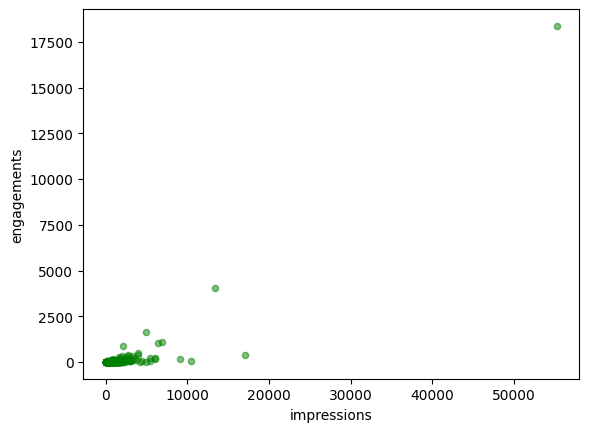

In [6]:
tweet_stats_df.plot.scatter(x= "impressions", y= "engagements", c= "green", alpha = 0.5)

(0.0, 500.0)

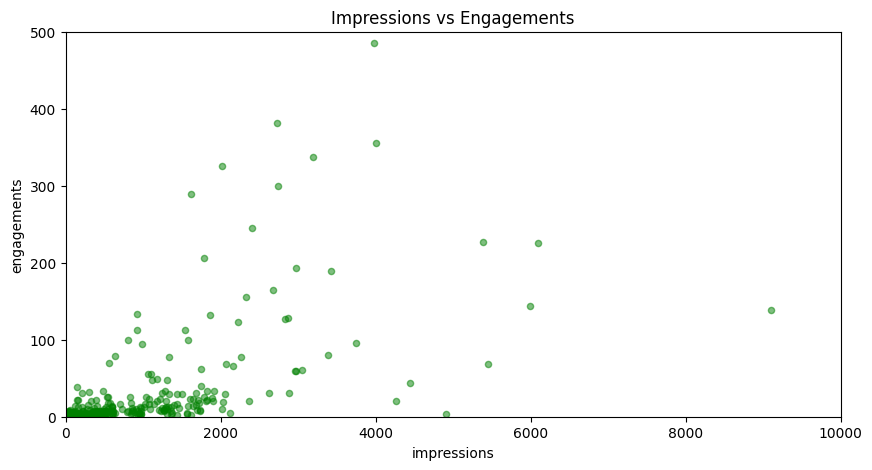

In [7]:
ax = tweet_stats_df.plot.scatter(x= "impressions", y= "engagements", c= "green", alpha = 0.5, figsize = (10, 5), title = "Impressions vs Engagements")
ax.set_xlim(0, 10000)
ax.set_ylim(0, 500)

In [8]:
tweet_stats_df.query('impressions > 8000').corr().style.background_gradient(cmap='RdBu', vmin = -1)

/var/folders/nz/_87_qswj7qlgr_f_mbwzsbsh0000gn/T/ipykernel_61181/3105659225.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tweet_stats_df.query('impressions > 8000').corr().style.background_gradient(cmap='RdBu', vmin = -1)


,Tweet_id,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,app_opens,follows,media_views,media_engagements,is_reply,is_quote,length,word_length,has_emoji,hashtag_count,month,day_of_week,hour,has_mentions,has_links,has_media,has_new_line,new_line_count,mention_count
Tweet_id,1.000000,-0.320353,-0.244859,0.190733,0.000728,-0.095287,-0.262254,-0.318537,-0.043026,nan,-0.212979,nan,nan,-0.244544,-0.244544,-0.409819,nan,-0.733988,-0.703842,0.250129,nan,nan,-0.423388,-0.413582,-0.409819,0.414679,nan,nan,nan,-0.736845
impressions,-0.320353,1.000000,0.972764,0.678283,0.896399,0.951044,0.977059,0.999993,0.864141,nan,0.978357,nan,nan,0.968277,0.968277,0.377204,nan,0.778091,0.738555,-0.115861,nan,nan,-0.613178,0.978333,0.377204,0.343788,nan,nan,nan,-0.054190
engagements,-0.244859,0.972764,1.000000,0.806553,0.963388,0.959883,0.999728,0.973064,0.949362,nan,0.923519,nan,nan,0.999802,0.999802,0.503146,nan,0.644202,0.584944,-0.299423,nan,nan,-0.733295,0.968203,0.503146,0.507780,nan,nan,nan,-0.010491
engagement_rate,0.190733,0.678283,0.806553,1.000000,0.922715,0.840773,0.795701,0.680401,0.950776,nan,0.603638,nan,nan,0.813644,0.813644,0.640548,nan,0.093745,0.082346,-0.380113,nan,nan,-0.959860,0.636200,0.640548,0.667051,nan,nan,nan,-0.032571
retweets,0.000728,0.896399,0.963388,0.922715,1.000000,0.959173,0.957706,0.897416,0.989557,nan,0.853548,nan,nan,0.965216,0.965216,0.502331,nan,0.425270,0.376900,-0.307614,nan,nan,-0.888662,0.870695,0.502331,0.641867,nan,nan,nan,-0.124805
replies,-0.095287,0.951044,0.959883,0.840773,0.959173,1.000000,0.959876,0.952163,0.941075,nan,0.925226,nan,nan,0.957380,0.957380,0.453089,nan,0.574831,0.575655,-0.079274,nan,nan,-0.796043,0.888579,0.453089,0.412634,nan,nan,nan,-0.108550
likes,-0.262254,0.977059,0.999728,0.795701,0.957706,0.959876,1.000000,0.977331,0.943476,nan,0.927965,nan,nan,0.999255,0.999255,0.501747,nan,0.660798,0.603554,-0.288747,nan,nan,-0.719575,0.971931,0.501747,0.488793,nan,nan,nan,-0.001931
user_profile_clicks,-0.318537,0.999993,0.973064,0.680401,0.897416,0.952163,0.977331,1.000000,0.865396,nan,0.978190,nan,nan,0.968595,0.968595,0.378793,nan,0.776479,0.737598,-0.115158,nan,nan,-0.615275,0.977755,0.378793,0.343868,nan,nan,nan,-0.054064
url_clicks,-0.043026,0.864141,0.949362,0.950776,0.989557,0.941075,0.943476,0.865396,1.000000,nan,0.794005,nan,nan,0.953418,0.953418,0.619575,nan,0.386364,0.347003,-0.379410,nan,nan,-0.885291,0.843700,0.619575,0.619575,nan,nan,nan,0.000000
hashtag_clicks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


(0.0, 10000.0)

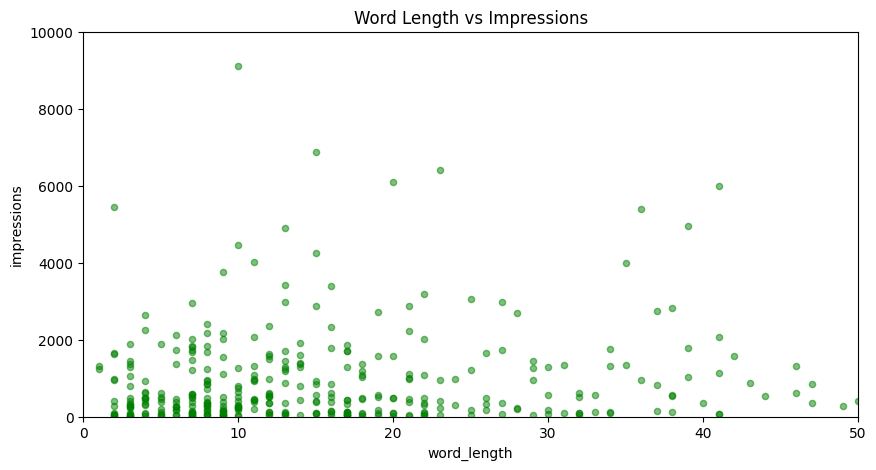

In [9]:
# Scatter plot of word length vs impressions
ax = tweet_stats_df.plot.scatter(x= "word_length", y= "impressions", c= "green", alpha = 0.5, figsize = (10, 5), title = "Word Length vs Impressions")
ax.set_xlim(0, 50)
ax.set_ylim(0, 10000)

It helps to respond on tweets with a large following. How did we arrive to that conclusion based on data? Theoretically, it makes sense.

Also, consider spearman correlation

<Axes: xlabel='impressions', ylabel='hour'>

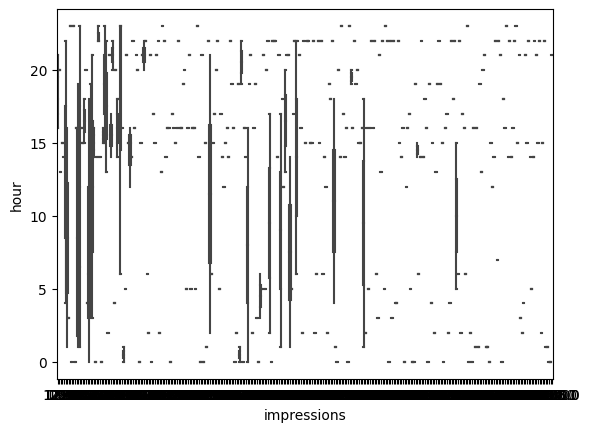

In [10]:
sns.boxplot(x = "impressions", y = 'hour', data = tweet_stats_df)

/var/folders/nz/_87_qswj7qlgr_f_mbwzsbsh0000gn/T/ipykernel_61181/1435132850.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tweet_stats_df.groupby('hour').mean().plot(kind = 'bar', y = 'impressions', figsize = (10, 5), title = "Average Impressions by Hour")


<Axes: title={'center': 'Average Impressions by Hour'}, xlabel='hour'>

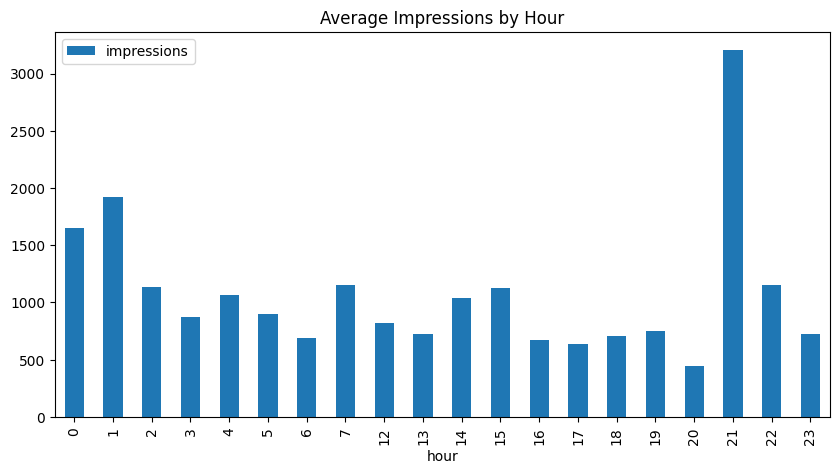

In [11]:
tweet_stats_df.groupby('hour').mean().plot(kind = 'bar', y = 'impressions', figsize = (10, 5), title = "Average Impressions by Hour")

## `CLUSTERING`

Let's look at the columns in our df again

In [27]:
tweet_stats_df.columns

Index(['Tweet_id', 'Tweet_permalink', 'Tweet_text', 'time', 'impressions',
       'engagements', 'engagement_rate', 'retweets', 'replies', 'likes',
       'user_profile_clicks', 'url_clicks', 'hashtag_clicks', 'detail_expands',
       'app_opens', 'follows', 'media_views', 'media_engagements', 'is_reply',
       'is_quote', 'length', 'word_length', 'has_emoji', 'hashtag_count',
       'month', 'day_of_week', 'hour', 'has_mentions', 'has_links',
       'has_media', 'has_new_line', 'new_line_count', 'mention_count'],
      dtype='object')

In [38]:
#Standardize the data in tweet_stats_df
xstd = preprocessing.StandardScaler().fit_transform(tweet_stats_df[['Tweet_id','impressions', 'engagements','replies', 'word_length','has_emoji', 'has_mentions', 'has_links', 'hour', 'day_of_week']])
xstd

array([[ 2.11161463, -0.24544178, -0.09909966, ..., -0.64728072,
         0.71537252, -1.37211467],
       [ 2.11126851, -0.33976279, -0.10010129, ..., -0.64728072,
         0.71537252, -1.37211467],
       [ 2.11120253, -0.25177003, -0.10010129, ..., -0.64728072,
         0.71537252, -1.37211467],
       ...,
       [-1.97625089, -0.17070821, -0.08808177, ..., -0.64728072,
         0.07556501, -1.37211467],
       [-2.11362414,  0.15745658, -0.08708014, ..., -0.64728072,
         0.20352651,  2.33156328],
       [-2.17039156, -0.20265078, -0.09909966, ..., -0.64728072,
        -1.0760885 ,  2.33156328]])

In [39]:
#Size of numpy array
xstd.shape

(359, 10)

In [44]:
xstd_df = pd.DataFrame(xstd, columns = ['Tweet_id','impressions', 'engagements','replies', 'word_length','has_emoji', 'has_mentions', 'has_links', 'hour', 'day_of_week'])
xstd_df

,Tweet_id,impressions,engagements,replies,word_length,has_emoji,has_mentions,has_links,hour,day_of_week
0,2.111615,-0.245442,-0.099100,-0.436099,-0.672970,-0.443471,0.595581,-0.647281,0.715373,-1.372115
1,2.111269,-0.339763,-0.100101,-0.436099,-0.856903,-0.443471,0.595581,-0.647281,0.715373,-1.372115
2,2.111203,-0.251770,-0.100101,0.115167,-1.132802,2.254938,0.595581,-0.647281,0.715373,-1.372115
3,2.097397,-0.304807,-0.063041,0.115167,-0.581003,-0.443471,0.595581,1.544925,0.331488,-1.372115
4,2.097092,0.457596,0.062162,1.217699,1.166361,-0.443471,-1.679032,-0.647281,0.331488,-1.372115
...,...,...,...,...,...,...,...,...,...,...
354,-1.834679,-0.344886,-0.101103,-0.436099,-0.581003,-0.443471,0.595581,-0.647281,-0.052396,-0.754835
355,-1.963761,0.033604,-0.093090,-0.436099,1.258328,2.254938,0.595581,-0.647281,0.331488,-1.372115
356,-1.976251,-0.170708,-0.088082,0.115167,-0.305103,2.254938,0.595581,-0.647281,0.075565,-1.372115
357,-2.113624,0.157457,-0.087080,-0.436099,-0.764936,-0.443471,-1.679032,-0.647281,0.203527,2.331563


In [45]:
xstd_df.describe()

,Tweet_id,impressions,engagements,replies,word_length,has_emoji,has_mentions,has_links,hour,day_of_week
count,3.590000e+02,3.590000e+02,359.000000,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,359.000000,3.590000e+02
mean,1.219204e-14,-9.896138e-18,0.000000,-2.968842e-17,-7.422104e-17,9.896138e-18,9.896138e-17,8.411718e-17,0.000000,-7.916911e-17
std,1.001396e+00,1.001396e+00,1.001396,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396,1.001396e+00
min,-2.170392e+00,-3.466937e-01,-0.102105,-4.360991e-01,-1.316735e+00,-4.434712e-01,-1.679032e+00,-6.472807e-01,-1.715896,-1.372115e+00
25%,-7.650088e-01,-3.138471e-01,-0.100101,-4.360991e-01,-7.649362e-01,-4.434712e-01,-1.679032e+00,-6.472807e-01,-1.076089,-7.548350e-01
50%,2.465560e-01,-2.065683e-01,-0.096095,1.151670e-01,-3.051035e-01,-4.434712e-01,5.955812e-01,-6.472807e-01,0.331488,-1.375554e-01
75%,7.086561e-01,4.008267e-02,-0.082072,1.151670e-01,5.225954e-01,-4.434712e-01,5.955812e-01,1.544925e+00,0.843334,4.797243e-01
max,2.111615e+00,1.628544e+01,18.304789,1.499935e+01,3.189625e+00,2.254938e+00,5.955812e-01,1.544925e+00,1.227219,2.331563e+00


Looks like the data is standardized properly as the mean is close to 0 and standard deviation is close to 1

Text(0.5, 1.0, 'Dendrogram')

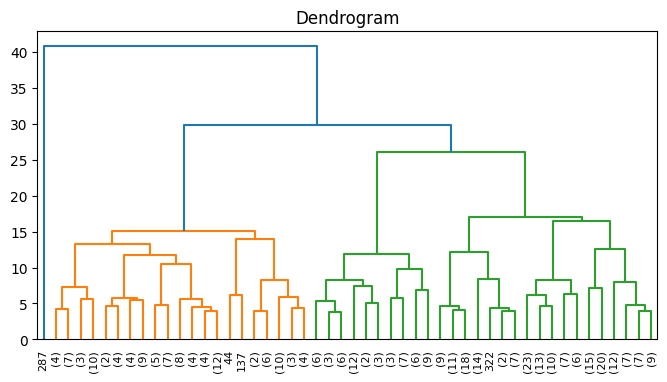

In [58]:
#Using scipy library to make a visualization of the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
fig,ax = plt.subplots(figsize=(8,4))
dendrogram(linkage(xstd_df, method = 'ward'), truncate_mode='lastp', p=50)
plt.title('Dendrogram')

In [70]:
clus = cluster.AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clus.fit(xstd_df)


AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [71]:
tweet_stats_df.assign(labels = clus.fit_predict(xstd_df)).groupby('labels').mean().T.style.background_gradient('RdBu', axis = 1)#.plot(kind = 'bar', y = 'impressions', figsize = (10, 5), title = "Average Impressions by Hour")

/var/folders/nz/_87_qswj7qlgr_f_mbwzsbsh0000gn/T/ipykernel_61181/3245806007.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tweet_stats_df.assign(labels = clus.fit_predict(xstd_df)).groupby('labels').mean().T.style.background_gradient('RdBu', axis = 1)#.plot(kind = 'bar', y = 'impressions', figsize = (10, 5), title = "Average Impressions by Hour")


labels,0,1,2,3
Tweet_id,1328252682824013312.000000,1328124959108688896.000000,1328191006057394688.000000,1326281851732856832.000000
impressions,468.031414,964.333333,1979.700000,55205.000000
engagements,8.125654,49.824561,125.700000,18377.000000
engagement_rate,0.027397,0.036341,0.047850,0.332887
retweets,0.052356,0.210526,0.409091,8.000000
replies,0.628272,0.526316,0.963636,28.000000
likes,1.424084,2.929825,6.181818,248.000000
user_profile_clicks,1.764398,4.385965,7.909091,421.000000
url_clicks,0.738220,4.210526,12.490909,85.000000
hashtag_clicks,0.010471,0.000000,0.009091,0.000000


In [72]:
tweet_stats_df.assign(labels = clus.fit_predict(xstd_df)).query('labels == 2')

,Tweet_id,Tweet_permalink,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,...,month,day_of_week,hour,has_mentions,has_links,has_media,has_new_line,new_line_count,mention_count,labels
4,1333454206594809857,https://twitter.com/__mharrison__/status/13334...,Teaching a ML course for the next two weeks. F...,2020-11-30 16:53:00+00:00,2681.0,164.0,0.061171,0.0,3.0,15.0,...,11,0,16,False,False,False,False,0,0,2
7,1333425819658584065,https://twitter.com/__mharrison__/status/13334...,The Modern Python workshop will be running nex...,2020-11-30 15:01:00+00:00,1217.0,23.0,0.018899,2.0,0.0,1.0,...,11,0,15,False,True,False,True,2,0,2
8,1333421448598233088,https://twitter.com/__mharrison__/status/13334...,"Want to learn Python, Pandas, SQL, Learning Te...",2020-11-30 14:43:00+00:00,2874.0,128.0,0.044537,5.0,1.0,14.0,...,11,0,14,False,True,False,True,1,0,2
16,1331999584592171008,https://twitter.com/__mharrison__/status/13319...,Pilgrimage to see the monolith... 🏜️◼️ https:/...,2020-11-26 16:33:00+00:00,1826.0,22.0,0.012048,0.0,0.0,13.0,...,11,3,16,False,True,False,False,0,0,2
18,1331718737238532096,https://twitter.com/__mharrison__/status/13317...,@mattragland Check out this setup. In particul...,2020-11-25 21:57:00+00:00,209.0,3.0,0.014354,0.0,0.0,1.0,...,11,2,21,True,True,False,False,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1324376102836428800,https://twitter.com/__mharrison__/status/13243...,I encourage my students to replace a calculato...,2020-11-05 15:40:00+00:00,2977.0,60.0,0.020155,3.0,1.0,22.0,...,11,3,15,False,True,False,False,0,0,2
341,1323781656302419968,https://twitter.com/__mharrison__/status/13237...,Here is a review of my Effective Pandas course...,2020-11-04 00:18:00+00:00,2063.0,68.0,0.032962,1.0,0.0,6.0,...,11,2,0,False,True,False,True,1,0,2
351,1323623901960630277,https://twitter.com/__mharrison__/status/13236...,Edited almost two and a half hours of content ...,2020-11-03 13:51:00+00:00,1028.0,16.0,0.015564,0.0,0.0,1.0,...,11,1,13,False,True,False,True,9,0,2
352,1323623310345658368,https://twitter.com/__mharrison__/status/13236...,To my US friends: If you haven't voted already...,2020-11-03 13:49:00+00:00,1918.0,34.0,0.017727,1.0,2.0,10.0,...,11,1,13,False,False,False,False,0,0,2


### `PCA`

In [73]:
#import decomposition
from sklearn import decomposition
pca = decomposition.PCA()
xpca = pca.fit_transform(xstd_df)
xpca

array([[-0.55443695,  0.13261924, -1.27599827, ...,  0.05783176,
        -0.40827655,  0.11806106],
       [-0.62626727,  0.15329419, -1.21379944, ...,  0.05550265,
        -0.37014751,  0.04920149],
       [-0.37219458,  0.72033135, -0.78394295, ...,  0.03010314,
         0.12307011, -0.033753  ],
       ...,
       [-0.22963294,  1.13198037, -0.7277274 , ...,  0.12273569,
         0.31648052, -0.10097693],
       [-0.35163773, -0.09219344,  1.63908757, ...,  1.53706997,
        -0.22812414, -0.01722625],
       [-0.79894077,  1.83018466,  1.8072949 , ..., -0.13459555,
        -0.10015947, -0.12740756]])

In [76]:
xpca_df = pd.DataFrame(xpca, columns=[f'PC{n+1}'for n in range(xpca.shape[1])])
xpca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.554437,0.132619,-1.275998,1.968279,-1.495361,-0.034652,-0.536938,0.057832,-0.408277,0.118061
1,-0.626267,0.153294,-1.213799,2.045070,-1.530736,-0.175756,-0.533205,0.055503,-0.370148,0.049201
2,-0.372195,0.720331,-0.783943,3.531638,0.398170,0.189653,0.351909,0.030103,0.123070,-0.033753
3,0.125248,-1.107993,-0.637251,1.922962,-1.287052,0.000556,-0.744767,-1.471306,0.225410,-0.060040
4,1.230808,-1.237224,-1.187890,1.214214,-1.018529,1.506263,-0.575369,1.744421,0.519743,0.013742
...,...,...,...,...,...,...,...,...,...,...
354,-0.643268,0.758282,-0.525333,-0.933300,0.707999,-1.490375,-0.820821,0.119654,-0.117682,-0.075078
355,-0.261365,0.794530,-1.466531,-0.199025,3.232530,0.205923,-0.139620,0.048587,-0.270522,0.118896
356,-0.229633,1.131980,-0.727727,0.456729,2.945944,-0.919732,-0.271014,0.122736,0.316481,-0.100977
357,-0.351638,-0.092193,1.639088,-2.140100,0.307795,-1.287275,1.619249,1.537070,-0.228124,-0.017226


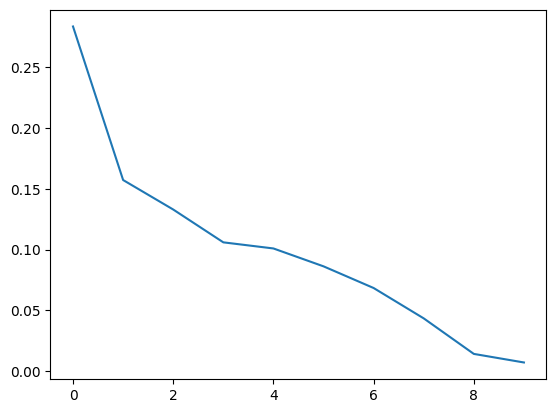

In [77]:
plt.plot(pca.explained_variance_ratio_)

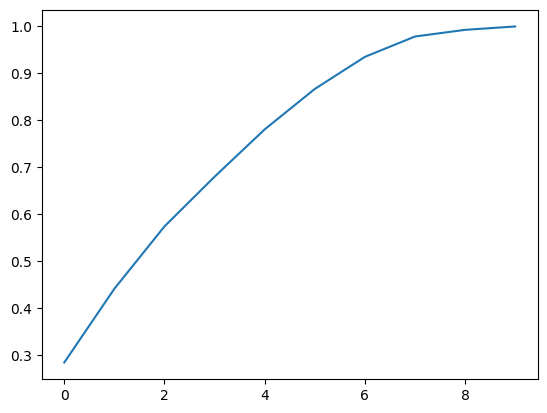

In [79]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [82]:
pd.DataFrame(pca.components_, columns=xstd_df.columns, index=[f'PC{n+1}'for n in range(xpca.shape[1])])

,Tweet_id,impressions,engagements,replies,word_length,has_emoji,has_mentions,has_links,hour,day_of_week
PC1,-0.008751,0.572002,0.558943,0.548957,0.094174,-0.027016,-0.099492,0.180926,0.037891,-0.072794
PC2,-0.106532,0.055182,0.166693,0.164650,-0.141409,0.160240,0.660038,-0.627079,-0.135623,0.194330
PC3,0.013315,0.087895,0.012150,-0.019394,-0.383324,0.121203,-0.223904,0.199468,-0.657455,0.554779
PC4,0.658977,0.010177,0.016609,0.028284,-0.424039,0.501456,0.001013,0.002880,0.049108,-0.361776
PC5,-0.569566,0.032624,-0.032108,-0.070406,0.176847,0.746218,-0.087628,0.083575,-0.111074,-0.231138
PC6,0.471952,-0.026248,-0.059362,0.043453,0.780041,0.207162,0.016249,-0.072681,-0.276490,0.194389
PC7,0.041477,0.014947,0.015368,0.001353,-0.028117,0.324376,-0.113237,0.024560,0.674438,0.650781
PC8,-0.023991,0.078050,-0.050325,0.078504,-0.027042,-0.030761,-0.682601,-0.716429,-0.017556,-0.058616
PC9,-0.065125,-0.291025,-0.506602,0.801737,-0.055179,0.022838,0.005534,0.089095,-0.004011,0.009122
PC10,0.021574,0.754437,-0.628811,-0.120696,-0.009119,-0.031618,0.132579,-0.012729,0.039216,-0.005328


Columns with maximum weight based on PCA

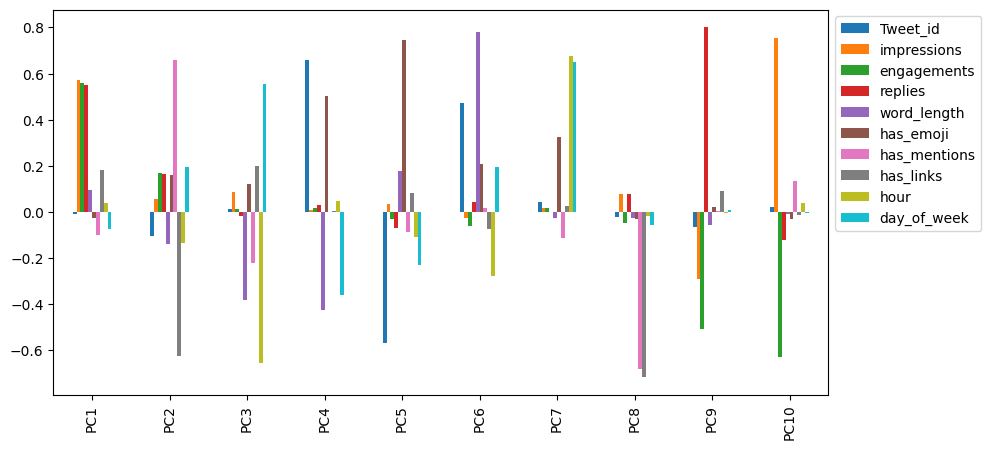

In [89]:
pd.DataFrame(pca.components_, columns=xstd_df.columns, index=[f'PC{n+1}'for n in range(xpca.shape[1])]).plot.bar(figsize=(10, 5)).legend(bbox_to_anchor=(1, 1))

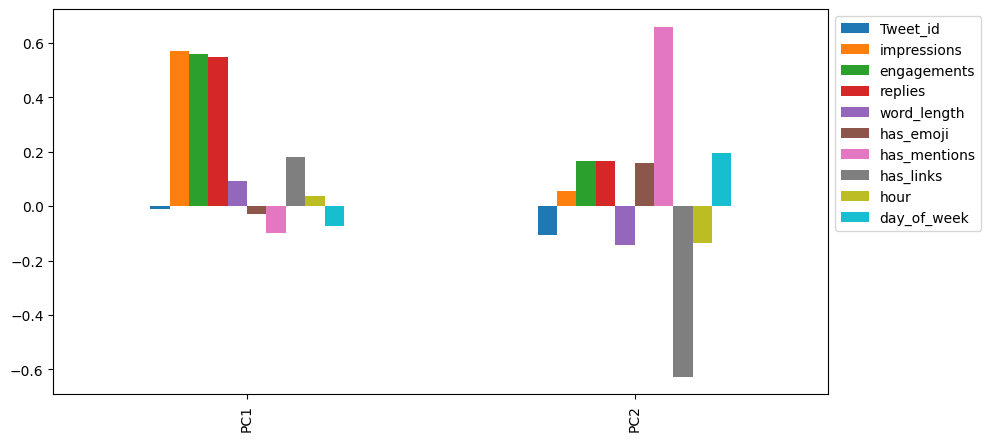

In [101]:
(pd.DataFrame(pca.components_, columns=xstd_df.columns, index=[f'PC{n+1}'for n in range(xpca.shape[1])])
 .iloc[:2]
.plot.bar(figsize=(10, 5)).legend(bbox_to_anchor=(1, 1))
)

For PC1, impressions, engagements and replies hold most weight in that order

<Axes: title={'center': 'PC1 vs PC2'}, xlabel='PC1', ylabel='PC2'>

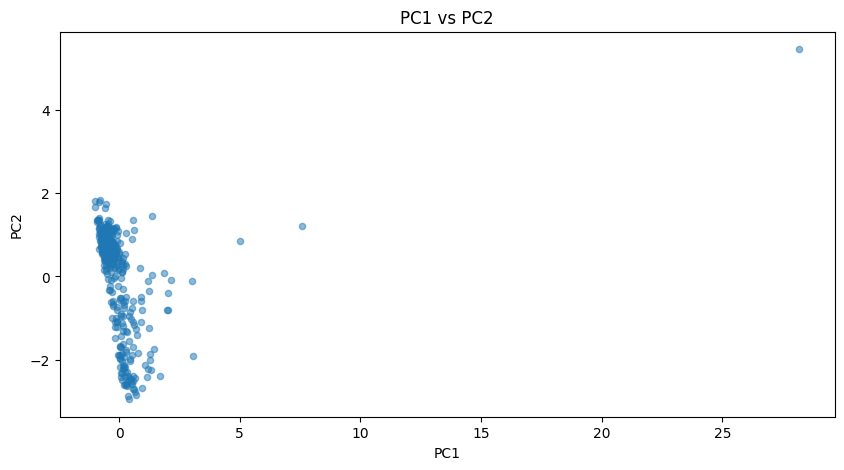

In [112]:
(pd.DataFrame(xpca, columns=[f'PC{n+1}'for n in range(xpca.shape[1])])
 .plot.scatter(x = 'PC1', y = 'PC2', alpha = 0.5, figsize = (10, 5), title = "PC1 vs PC2"
            )
 )

In [108]:
tweet_stats_df.query('impressions > 25_000')

,Tweet_id,Tweet_permalink,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,...,hashtag_count,month,day_of_week,hour,has_mentions,has_links,has_media,has_new_line,new_line_count,mention_count
287,1326281851732856832,https://twitter.com/__mharrison__/status/13262...,@JamesClear Bought a mirrorless SLR to use as ...,2020-11-10 21:53:00+00:00,55205.0,18377.0,0.332887,8.0,28.0,248.0,...,0,11,1,21,True,True,False,False,0,1


<Axes: title={'center': 'PC1 vs PC2'}, xlabel='PC1', ylabel='PC2'>

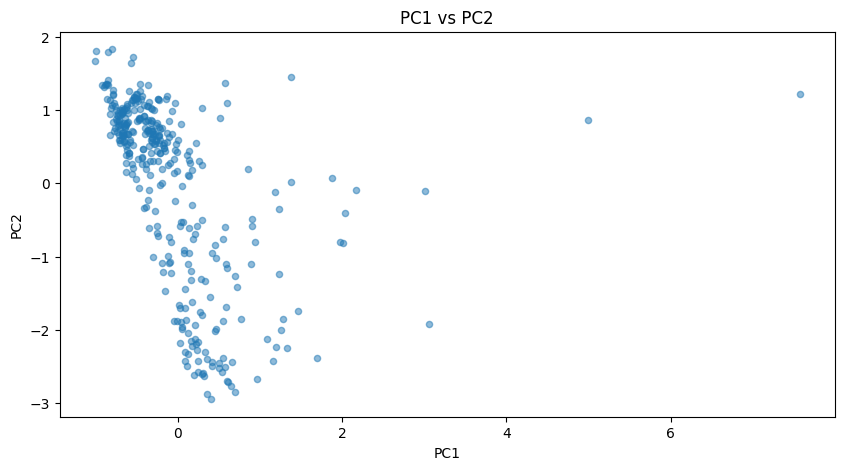

In [120]:
(pd.DataFrame(xpca, columns=[f'PC{n+1}'for n in range(xpca.shape[1])])
 .loc[lambda df : df.index != 287]
 .plot.scatter(x = 'PC1', y = 'PC2', alpha = 0.5, figsize = (10, 5), title = "PC1 vs PC2"
            )
 )

<Axes: title={'center': 'PC1 vs PC2'}, xlabel='PC1', ylabel='PC2'>

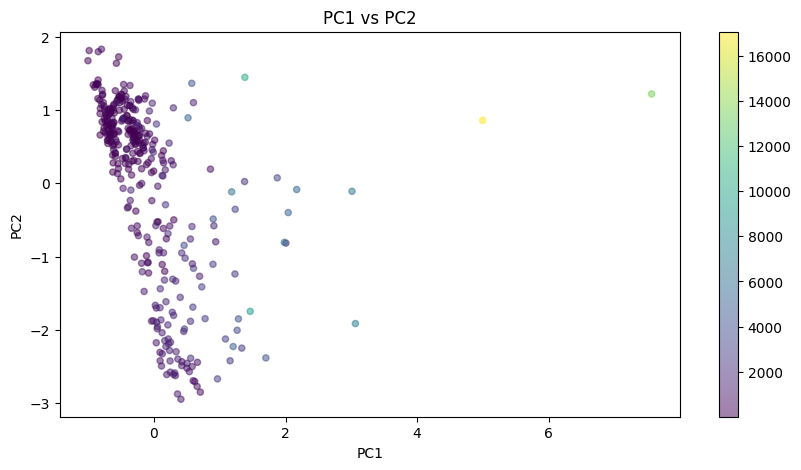

In [123]:
(pd.DataFrame(xpca, columns=[f'PC{n+1}'for n in range(xpca.shape[1])])
 .loc[lambda df : df.index != 287]
 .plot.scatter(x = 'PC1', y = 'PC2', alpha = 0.5, figsize = (10, 5), title = "PC1 vs PC2",
               c = tweet_stats_df.loc[lambda df : df.index != 287].impressions,cmap = 'viridis'
            )
 )